# Post-Covid19 Survival Kit for Airbnb Hosts

## Dinis Oliveira Costa | Data Part-time Dec 2019

In [168]:
# Add small description of the goal of the project
# Add Airbnb logo and Ironhack logo

In [ ]:
# Data colected:

# calendar
# detailed_listings
# sum_listings
# reviews
# neighbourhoods w/ geo location

# Data missing:
# Idealista - price per neighborhood 
# Idealista - list of neighborhoods

In [170]:
# Data Processing
import pandas as pd
import numpy as np
import scipy

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython


plt.rcParams["figure.figsize"] = (16,6)
plt.style.use('fivethirtyeight')

# Misc libraries
import random
import time

# Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, HuberRegressor

# Boost
# import xgboost as xgb

# Ensemble (if used try GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesClassifier

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
# Detailed Calendar Data for listings in Barcelona
calendar = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/calendar.csv')

In [17]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,513825,2020-05-11,f,$150.00,$135.00,2.0,365.0
1,515230,2020-05-12,f,$44.00,$44.00,90.0,1125.0
2,515230,2020-05-13,f,$44.00,$44.00,90.0,1125.0
3,515230,2020-05-14,f,$44.00,$44.00,90.0,1125.0
4,515230,2020-05-15,f,$44.00,$44.00,90.0,1125.0


In [29]:
# Detailed Listings data for Barcelona
detailed_listings = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/detailed_listings.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
detailed_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21974,https://www.airbnb.com/rooms/21974,20200511052952,2020-05-11,Comf. double room/private bathroom,It is private double room with private bathroo...,Comfortable double room with private bathroom....,It is private double room with private bathroo...,none,NaN,...,t,f,moderate,f,f,3,1,2,0,0.05
1,23197,https://www.airbnb.com/rooms/23197,20200511052952,2020-05-12,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,I do not accept groups of young people under 2...,Elegant spacious apartment suitable for 6. Amp...,I do not accept groups of young people under 2...,none,Strategically located in the area of Parc del ...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,0.47
2,31958,https://www.airbnb.com/rooms/31958,20200511052952,2020-05-11,"Gaudi Attic 1, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,"Looking for apartments in Gràcia, Barcelona fo...",...,t,f,strict_14_with_grace_period,f,f,29,29,0,0,1.67
3,32471,https://www.airbnb.com/rooms/32471,20200511052952,2020-05-11,"Gaudi Attic 2, Friendly Rentals","This apartment has: 2 double beds, 1 single be...","This apartment has: 2 double beds, 1 single be...","This apartment has: 2 double beds, 1 single be...",none,"Looking for apartments in Gràcia, Barcelona fo...",...,t,f,strict_14_with_grace_period,f,f,29,29,0,0,0.83
4,32711,https://www.airbnb.com/rooms/32711,20200511052952,2020-05-11,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,Originally a typical Barcelona style three bed...,A lovely two bedroom apartment only 250 m from...,none,What's nearby This apartment is located in c...,...,t,f,flexible,f,f,6,6,0,0,0.59


In [32]:
# Summary information and metrics for listings in Barcelona (good for visualisations)
sum_listings = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/summary_listings.csv')

In [33]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


In [36]:
# Detailed Calendar Data for listings in Barcelona
calendar = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/calendar.csv')

In [37]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,513825,2020-05-11,f,$150.00,$135.00,2.0,365.0
1,515230,2020-05-12,f,$44.00,$44.00,90.0,1125.0
2,515230,2020-05-13,f,$44.00,$44.00,90.0,1125.0
3,515230,2020-05-14,f,$44.00,$44.00,90.0,1125.0
4,515230,2020-05-15,f,$44.00,$44.00,90.0,1125.0


In [95]:
# Detailed Review Data for listings in Barcelona
reviews = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/reviews.csv')

In [96]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,23197,199839,2011-03-15,409630,Tim,We (5 friends) were staying for a conference i...
1,23197,857673,2012-01-11,1594062,Aaron,The host canceled my reservation 138 days befo...
2,23197,40030652,2015-07-27,4933115,Thomas,We had a nice stay at the apartment. It is a 1...
3,23197,48679422,2015-09-28,154018,Addison,Great apartment! It was plenty spacious for us...
4,23197,50292863,2015-10-11,11726135,Wallace,I stayed in Marnie's apartment with two collea...


In [62]:
# Neighbourhood list for geo filter. Sourced from city or open source GIS files.
neighbourhoods = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/neighbourhoods.csv')

In [169]:
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


In [70]:
# GeoJSON file of neighbourhoods of the city
neighbourhoods_geo = pd.read_json('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/neighbourhoods.geojson')

In [68]:
neighbourhoods_geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


## 1. Exploratory data analysis

In [114]:
# Merge dataframes with complementary data
# Fix Missing values 

# Check Outliers 
# Fix Outliers if any - price
# Remove outliers from price to fix the histogram

# Add comments to data cleaning/manipulation

In [75]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


In [76]:
sum_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [90]:
sum_listings.shape

(20858, 16)

In [156]:
# change last_review to numerical? 
sum_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [106]:
sum_listings.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                            6
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5347
reviews_per_month                 5347
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Text(0.5, 1.0, 'Number of Reviews')

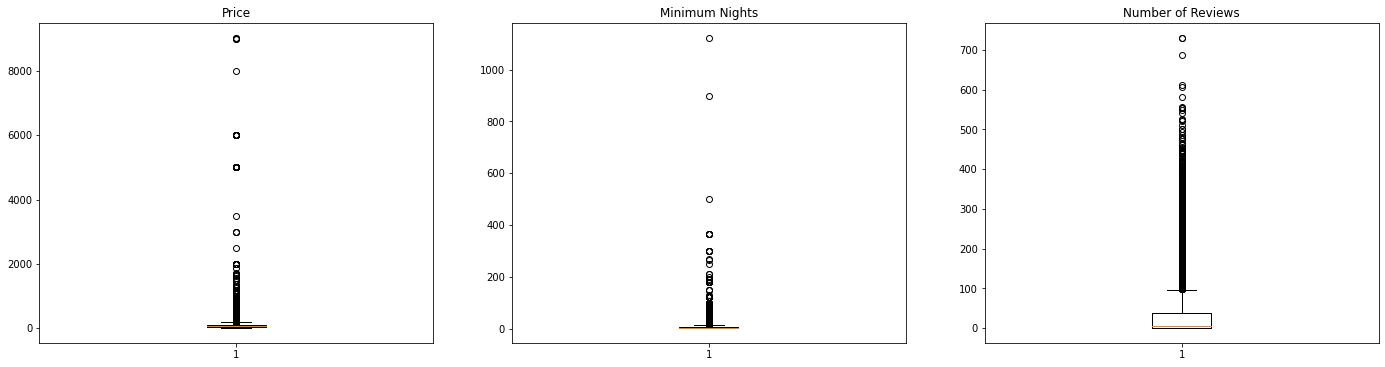

In [111]:
plt.figure(figsize = (24, 20))

ax=plt.subplot(331)
plt.boxplot(sum_listings['price'])
ax.set_title('Price')

ax=plt.subplot(332)
plt.boxplot(sum_listings['minimum_nights'])
ax.set_title('Minimum Nights')

ax=plt.subplot(333)
plt.boxplot(sum_listings['number_of_reviews'])
ax.set_title('Number of Reviews')

# ax=plt.subplot(334)
# plt.boxplot(sum_listings['reviews_per_month'])
# ax.set_title('Reviews per Month')

# ax=plt.subplot(335)
# plt.boxplot(sum_listings['calculated_host_listings_count'])
# ax.set_title('Calculated Host Listings Count')

# ax=plt.subplot(336)
# plt.boxplot(sum_listings['availability_365'])
# ax.set_title('Availability 365')

In [112]:
# Look for outliers (check code from second last lab)

## 2. Data Visualization

In [157]:
# Visualization categorical variables
# Plot similar variables in the same figure - add function
# neighbourhood_group, neighbourhood_group, room_type

# Visualization numerical variables
# Distribution/Histogram price
# Distribution room_type
# Distribution location
# price, minimum_nights, number_of_reviews, reviews_per_month, 
# calculated_host_listings_count, availability_365

# Heatmap correlation
# Geoplot / Folium 
# Barcelona JSON neighborhoods

# Add comments to plots with conclusions about the data

In [115]:
sum_listings.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 2.1 Visualization categorical variables

[Text(0, 0, 'Eixample'),
 Text(0, 0, 'Ciutat Vella'),
 Text(0, 0, 'Sants-Montjuïc'),
 Text(0, 0, 'Sant Martí'),
 Text(0, 0, 'Gràcia'),
 Text(0, 0, 'Sarrià-Sant Gervasi'),
 Text(0, 0, 'Horta-Guinardó'),
 Text(0, 0, 'Les Corts'),
 Text(0, 0, 'Sant Andreu'),
 Text(0, 0, 'Nou Barris')]

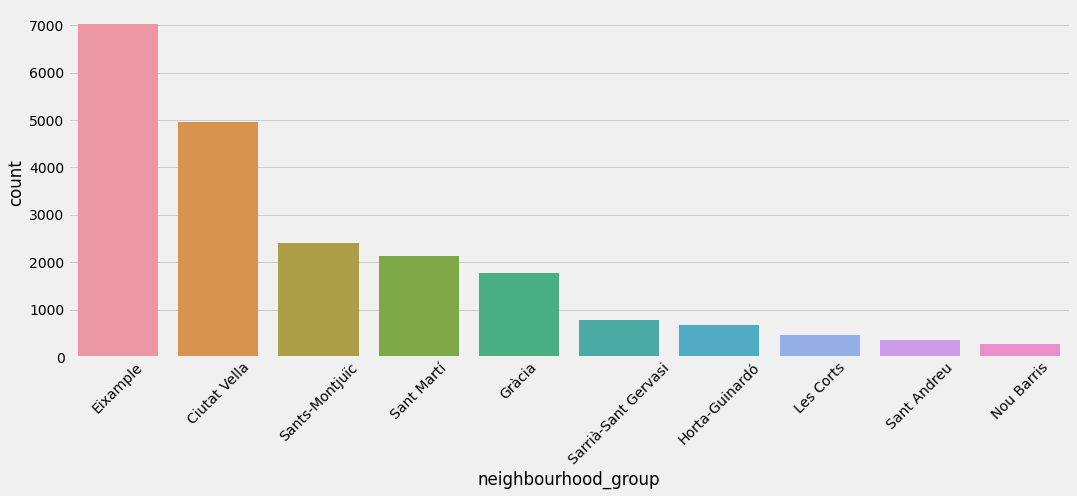

In [143]:
# Plotting top neighbourhood_groups
ax=sns.countplot(x="neighbourhood_group", data=sum_listings, 
              order=sum_listings.neighbourhood_group.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, "la Dreta de l'Eixample"),
 Text(0, 0, 'el Raval'),
 Text(0, 0, 'el Barri Gòtic'),
 Text(0, 0, 'Sant Pere, Santa Caterina i la Ribera'),
 Text(0, 0, 'el Poble Sec'),
 Text(0, 0, 'la Vila de Gràcia'),
 Text(0, 0, "l'Antiga Esquerra de l'Eixample"),
 Text(0, 0, 'la Sagrada Família'),
 Text(0, 0, 'Sant Antoni'),
 Text(0, 0, "la Nova Esquerra de l'Eixample")]

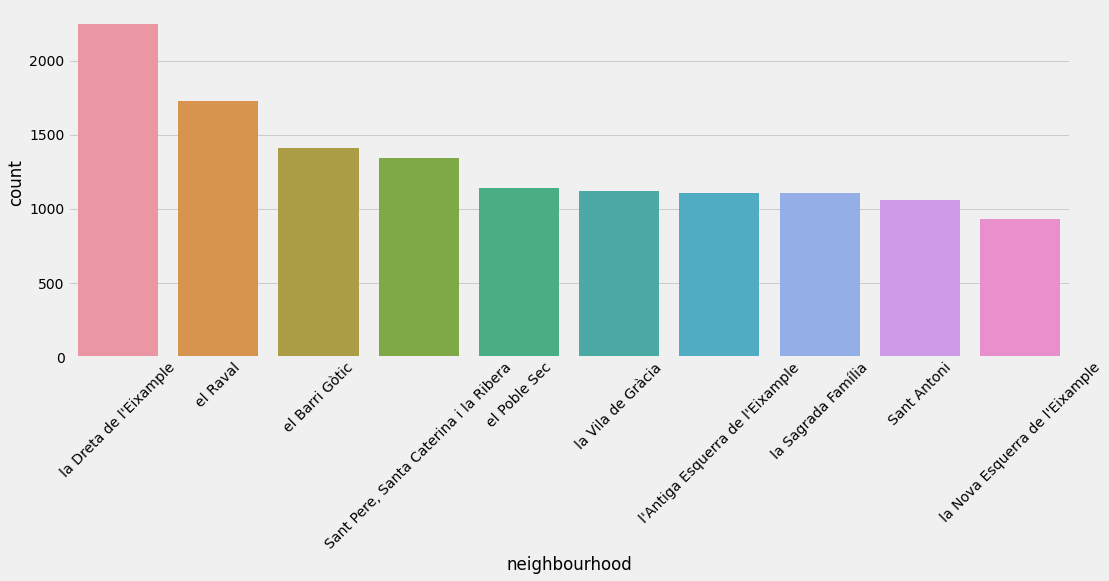

In [142]:
# Plotting top neighbourhoods
ax=sns.countplot(x="neighbourhood", data=sum_listings, 
                 order=sum_listings.neighbourhood.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

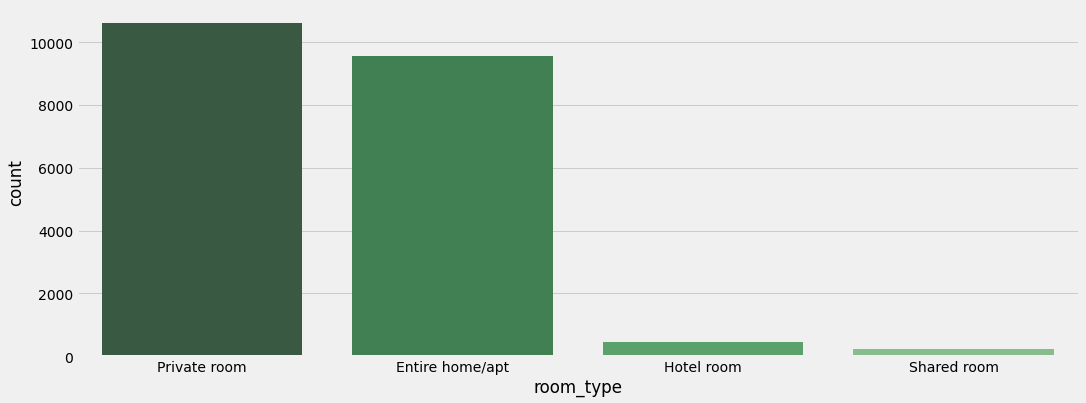

In [144]:
# Plotting room_type

sns.countplot(x="room_type", data=sum_listings, palette="Greens_d",
              order=sum_listings.room_type.value_counts().index)

### 2.2 Numerical Variables Visualization

(0.0, 1000.0)

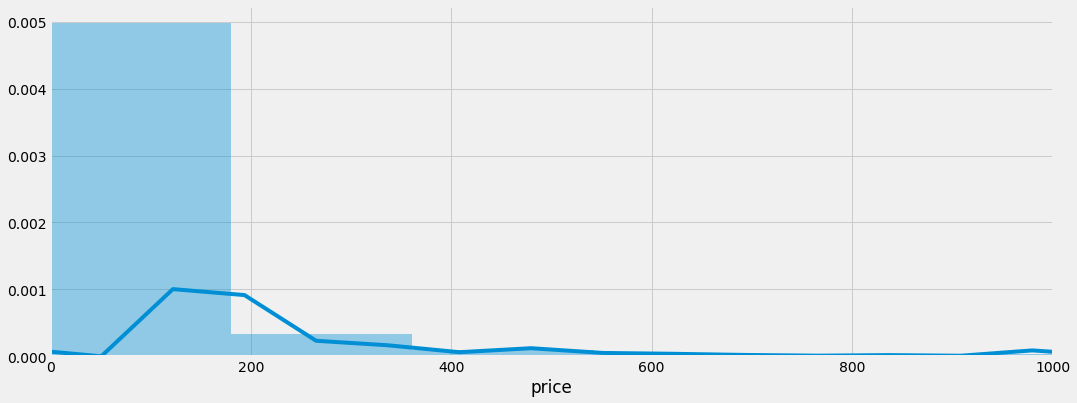

In [163]:
# Remove outliers from price to fix the histogram
sns.distplot(sum_listings['price'])
plt.xlim(0, 1000)

In [155]:
print(sum_listings['price'].mean())
print(sum_listings['price'].min())
print(sum_listings['price'].max())

124.2107105187458
0
9034


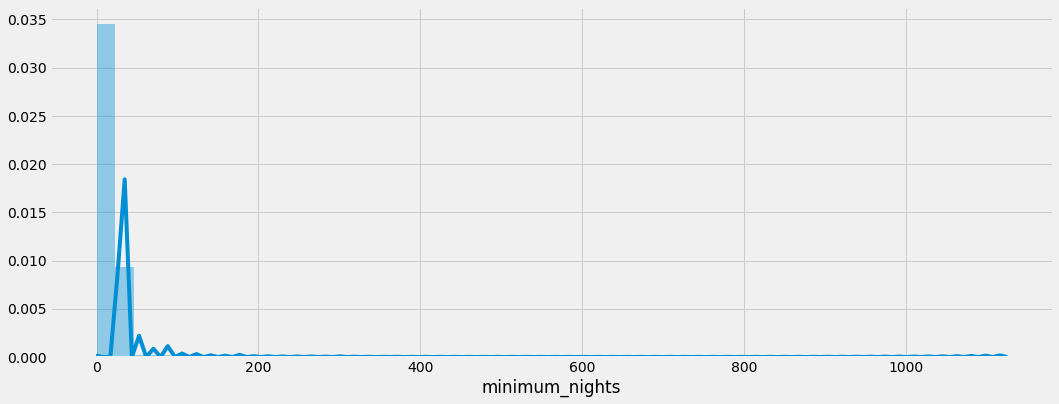

In [159]:
sns.distplot(sum_listings['minimum_nights'])

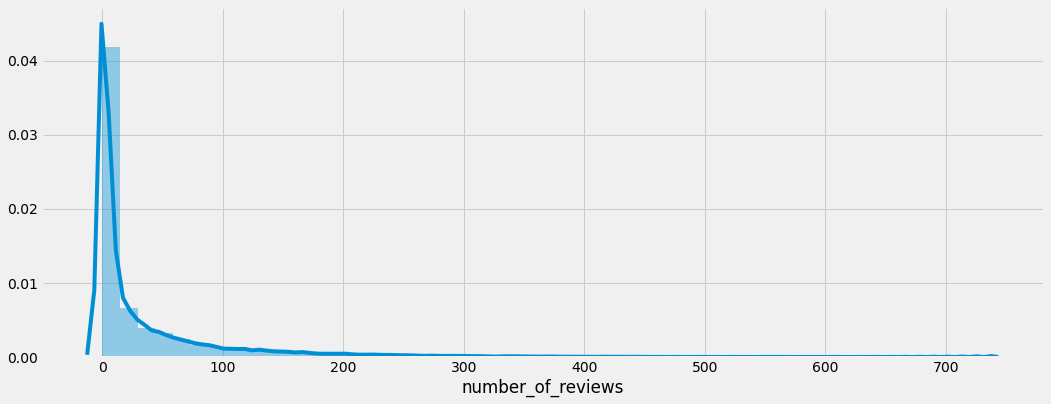

In [164]:
sns.distplot(sum_listings['number_of_reviews'])

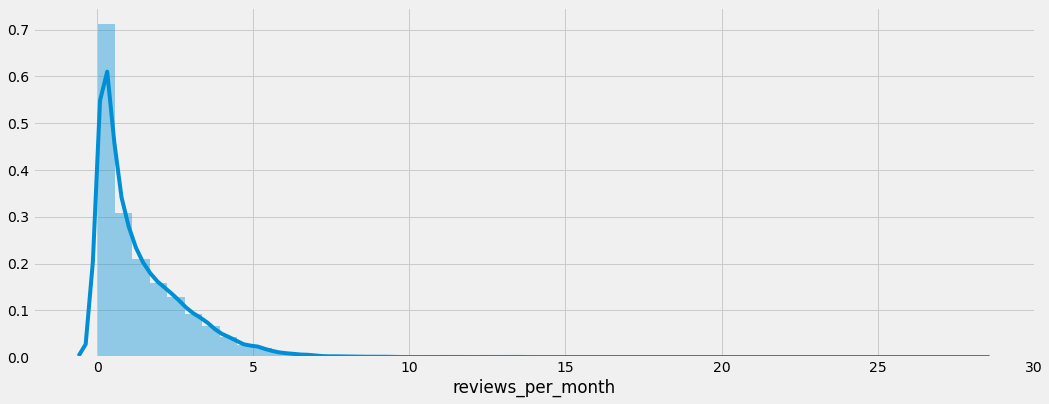

In [165]:
sns.distplot(sum_listings['reviews_per_month'])

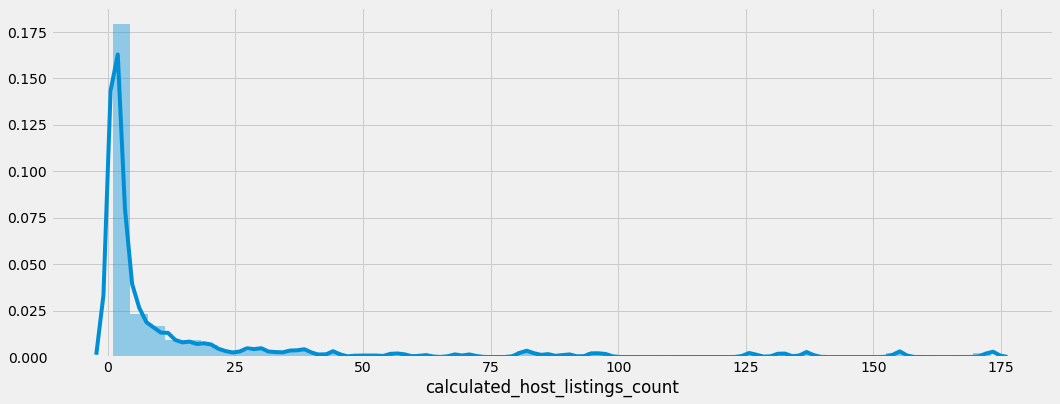

In [166]:
sns.distplot(sum_listings['calculated_host_listings_count'])

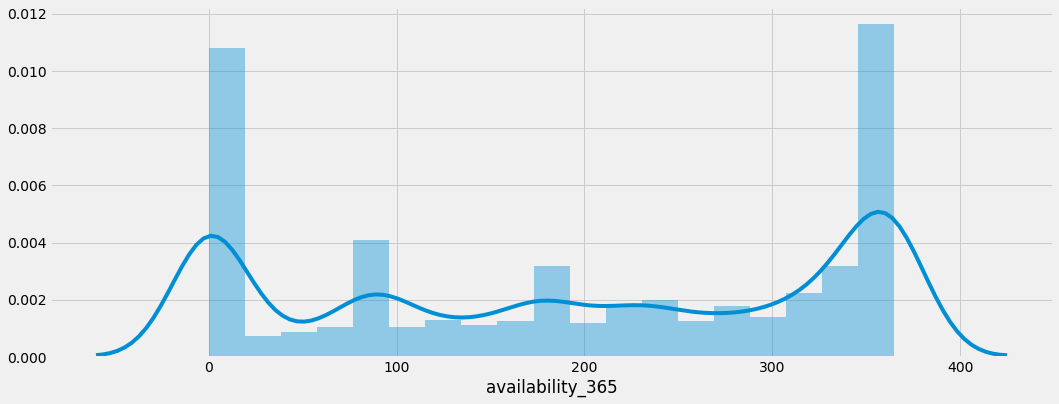

In [167]:
sns.distplot(sum_listings['availability_365'])